  <H2> Time Series Analysis For Bitcoin </H2>

__Problem Statement__ - We are given OHLC data for 14 different cryptocurrencies and we have to leverage various time series 
analysis alogorithms to predict the price of the cryptocurrency and to determinne Value at Risk, Efficient Frontier & Maximum 
Sharpe Ratio Portfolio. 

In [2]:
#importing necessary libraries
import os
import numpy as np 
import pandas as pd
from statsmodels.tsa.stattools import adfuller,kpss
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
os.chdir(r"C:\Users\mehul\Time_Series_Analysis")
from statsmodels.tsa.arima_model import ARIMA
from arch.unitroot import PhillipsPerron
import statsmodels.tsa.api as smt

The Prediction Class consists of methods for decribing data, missing values, plotting time series, Calculating Percentage 
Change & Returns and carrying out Stationarity Test for The Time Series.

In [4]:
from predictions import *

In [5]:
df_bt = predictions("bitcoin_price.csv")
df_bt.data = df_bt.data.reindex(index=df_bt.data.index[::-1])

In [4]:
#Dataset Discription
df_bt.description()

              Open    High     Low   Close Volume      Market Cap      Mean
2013-04-28  135.30  135.98  132.10  134.21      -  1,50,05,20,000  134.3975
2013-04-29  134.44  147.49  134.00  144.54      -  1,49,11,60,000  140.1175
2013-04-30  144.00  146.93  134.05  139.00      -  1,59,77,80,000  140.9950
2013-05-01  139.00  139.89  107.72  116.99      -  1,54,28,20,000  125.9000
2013-05-02  116.38  125.60   92.28  105.21      -  1,29,21,90,000  109.8675
---------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1760 entries, 2013-04-28 to 2018-02-20
Freq: D
Data columns (total 7 columns):
Open          1760 non-null float64
High          1760 non-null float64
Low           1760 non-null float64
Close         1760 non-null float64
Volume        1760 non-null object
Market Cap    1760 non-null object
Mean          1760 non-null float64
dtypes: float64(5), object(2)
memory usage: 110.0+ KB
None
---------------------------------------

In [5]:
#Checking missing values in dataset
df_bt.missing()

Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
Mean          0
dtype: int64
---------------------------------------------------------------


<h4> Daily Price - We Found that the stock price for Bitcoin started increasing after 2017</h4>

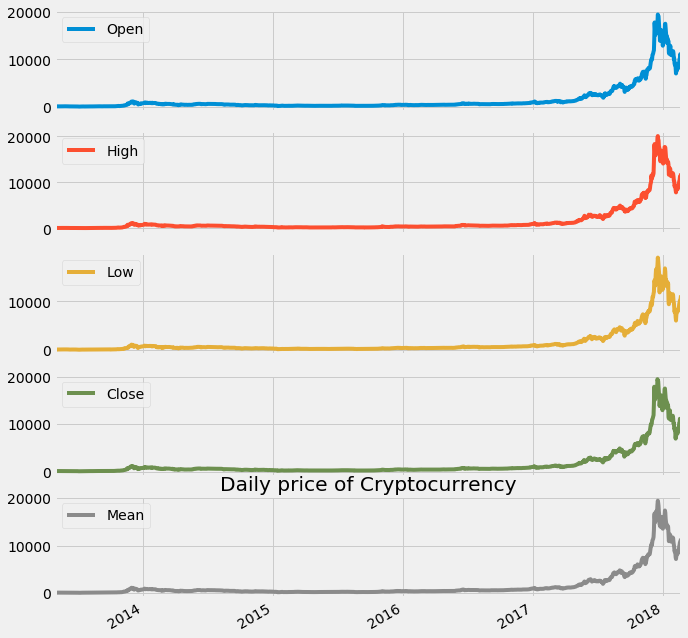

In [6]:
df_bt.plot_daily()

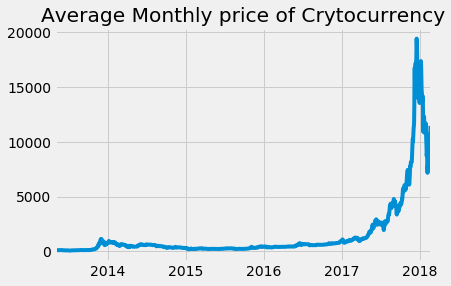

In [7]:
#Monthly Change in Price 
df_bt.plot_monthly()

Plotting Percentage Change in Price 

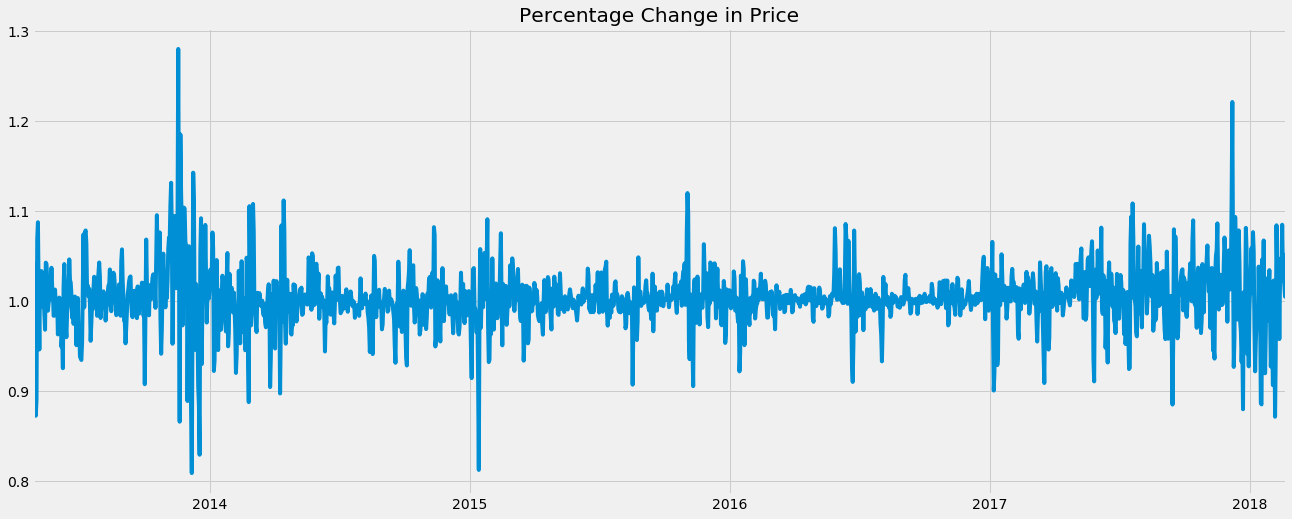

In [6]:
df_bt.Percent_change()

Plotiing 1 Day shifted Returns - We found that the Returns Time series looks like white noise and nearly Stationary

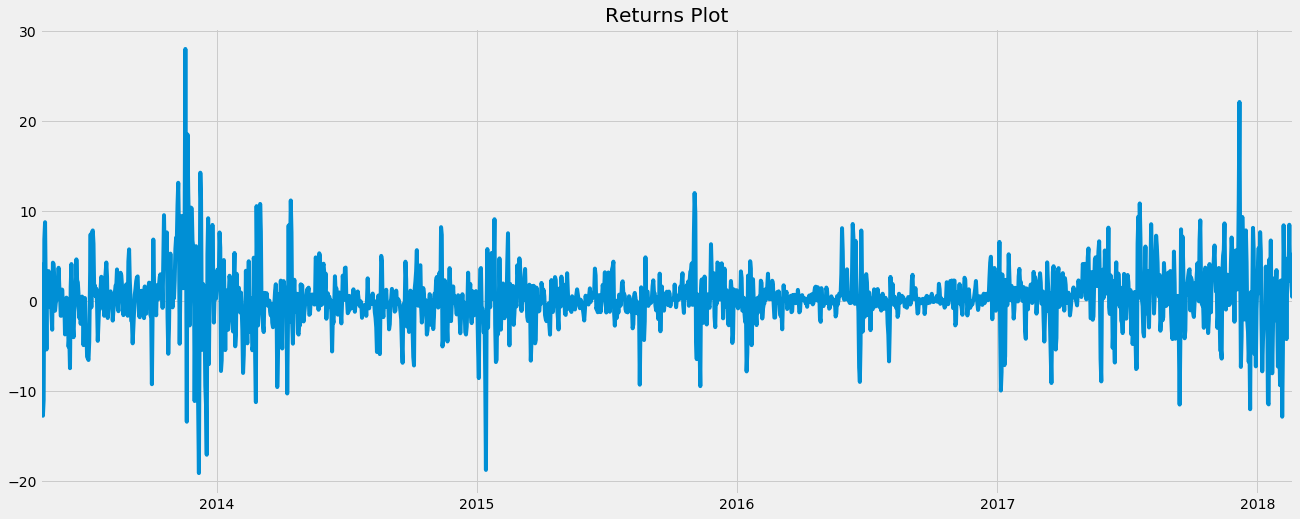

In [7]:
df_bt.Returns()

__Stationarity Test__- The time series need to be stationary because the available statistical methods are valid for stationary
time Series only.
A Time Series is said to be stationary when it has:-
- A constant mean
- A constant variance 
- An autocovariance that does not depend on time

Concept of Unit Root- Consider an first order autoregressive model equation-- y(t) = Rho*y(t-1) + e(t)
E(y(t)) = Rho*E(y(t-1)) +E(e(t)) where E() stands for Expectation of y(t). We find that as Rho increases from zero to one the time series becomes more and more non-stationary.If Rho is less than 1 then the series can be made stationary by taking the first difference.If rho is zero than the next term in time series not at all depends on previous value and is varied by only error term. If rho is greater than one the time series can be made stationary by higher order differencing or decomposition. As Rho increases to one the next terme depends both on previous term and error.therefore, its mean will not remain constant and time series will become non stationary.

Methods to check stationarity test:-
- __Plotting Rolling Statistics__ - By plotting the rolling mean and standard deviation we can see that if the mean and variance is constant or not. Since we have daily data therefore, rolling window of 30 is taken in both mean and variance.
- __Statistical Tests__
- __Dickey Fuller Test__ - Here the Null Hypothesis is that the time series is non-stationary. The test gives a test statistic    and critical values at 90%, 95% & 99% Confidence Interval. If the test statistic is less than 99% critical value we can say by 99% Confidence that the time series is sattionary and we can reject the null hypothesis. It checks the presence of the unitroot in the time series. ADF statistic is a negative number and more negative it,more easy it is to neglect the null hypothesis. Here the null hypothesis is the time series has unitroot that is it is non-stationary.
- __KPSS Test(Kwiatkowski–Phillips–Schmidt–Shin (KPSS) test)__ It breaks a time series in three parts a deterministic trend, a random walk and an error term.Here the absence od unit root is not the proof of stationarity but of trend stationarity.It is possible for a time series to be non stationary, having no unit root but trend stationary(In the statistical analysis of time series, a stochastic process is trend stationary if an underlying trend (function solely of time) can be removed, leaving a stationary process.The trend does not have to be linear). 
- __Phillip-Pherron Test__- This is a test to check the presence of a unitroot.Here the NULL Hypothesis is that the times series is integrated of order 1. the Phillips–Perron test addresses the issue that the process generating data for y_{t} might have a higher order of autocorrelation than is admitted in the test equation—making Y_{t-1} endogenous and thus invalidating the Dickey–Fuller t-test. 


C:\Users\mehul\Time_Series_Analysis\predictions.py:59: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.data.rolmean = self.data.Mean.rolling(30).mean()
C:\Users\mehul\Time_Series_Analysis\predictions.py:60: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.data.rolstd = self.data.Mean.rolling(30).std()


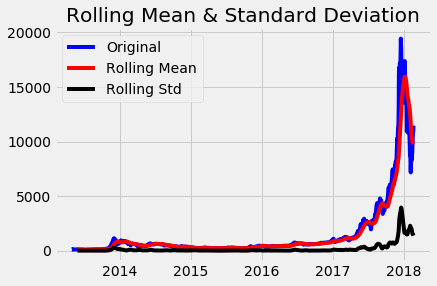

Results of Dickey-Fuller Test
Test Statistic                   -1.503662
p-value                           0.531699
#Lags Used                       25.000000
Number of Observations Used    1734.000000
Critical Value(1%)               -3.434127
Critical Value(5%)               -2.863208
Critical Value(10%)              -2.567658
dtype: float64
------------------------------------------------------------------------------
Results of KPSS Test:
Test Statistic            2.443039
p-value                   0.010000
Lags Used                25.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
------------------------------------------------------------------------------
Results of Phillips-Perron Test:
     Phillips-Perron Test (Z-tau)    
Test Statistic                 -0.215
P-value                         0.937
Lags                               25
-----------------------------

C:\Users\mehul\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1707: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


In [10]:
df_bt.stationarity_test()

__Taking only Data after 1st January 2017 as before that there was minimalistic increase in the value of the Bitcoin__ 

In [8]:
df_bt.data = df_bt.data['2017-01-01':]

               Open     High      Low    Close        Volume       Market Cap  \
2017-01-01   963.66  1003.08   958.70   998.33  14,77,75,000  15,49,12,00,000   
2017-01-02   998.62  1031.39   996.70  1021.75  22,21,85,000  16,05,51,00,000   
2017-01-03  1021.60  1044.08  1021.60  1043.84  18,51,68,000  16,42,66,00,000   
2017-01-04  1044.40  1159.42  1044.40  1154.73  34,49,46,000  16,79,54,00,000   
2017-01-05  1156.73  1191.10   910.42  1013.38  51,01,99,000  18,60,40,00,000   

                 Mean   Percent   Returns  
2017-01-01   980.9425  1.023054  2.305396  
2017-01-02  1012.1150  1.031778  3.177811  
2017-01-03  1032.7800  1.020418  2.041764  
2017-01-04  1100.7375  1.065801  6.580056  
2017-01-05  1067.9075  0.970175 -2.982546  
---------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 416 entries, 2017-01-01 to 2018-02-20
Freq: D
Data columns (total 9 columns):
Open          416 non-null float64
High          416 n

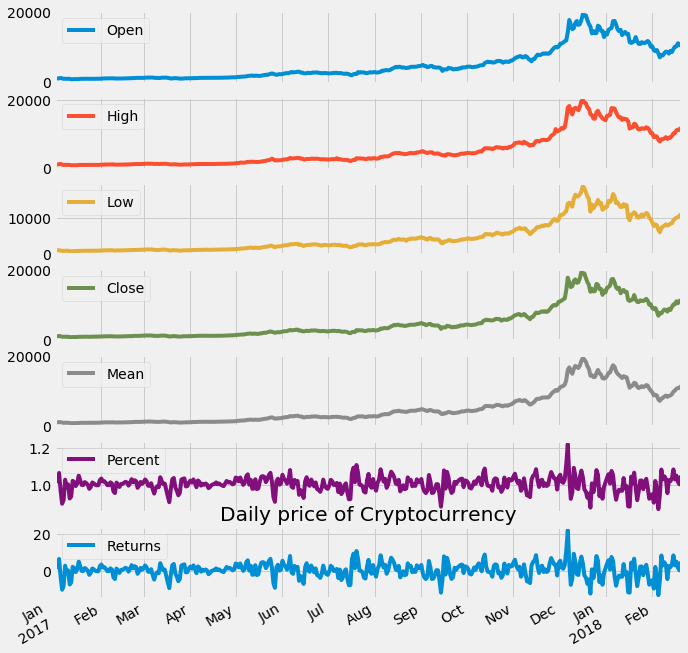

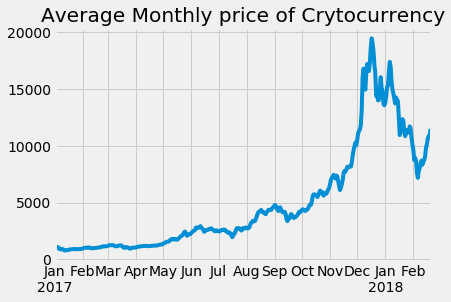

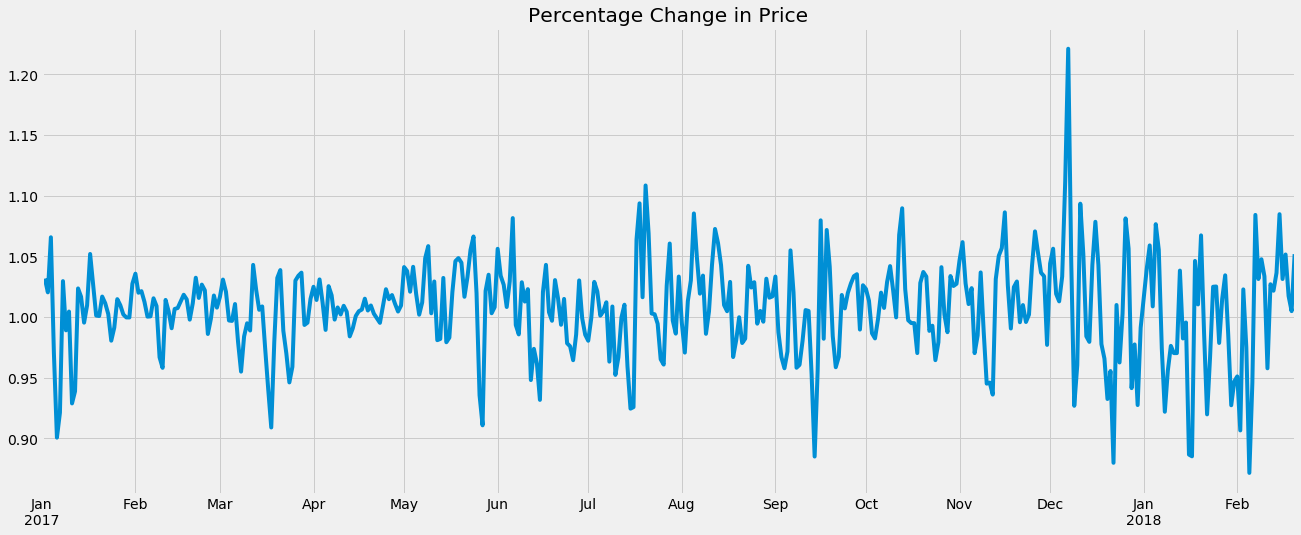

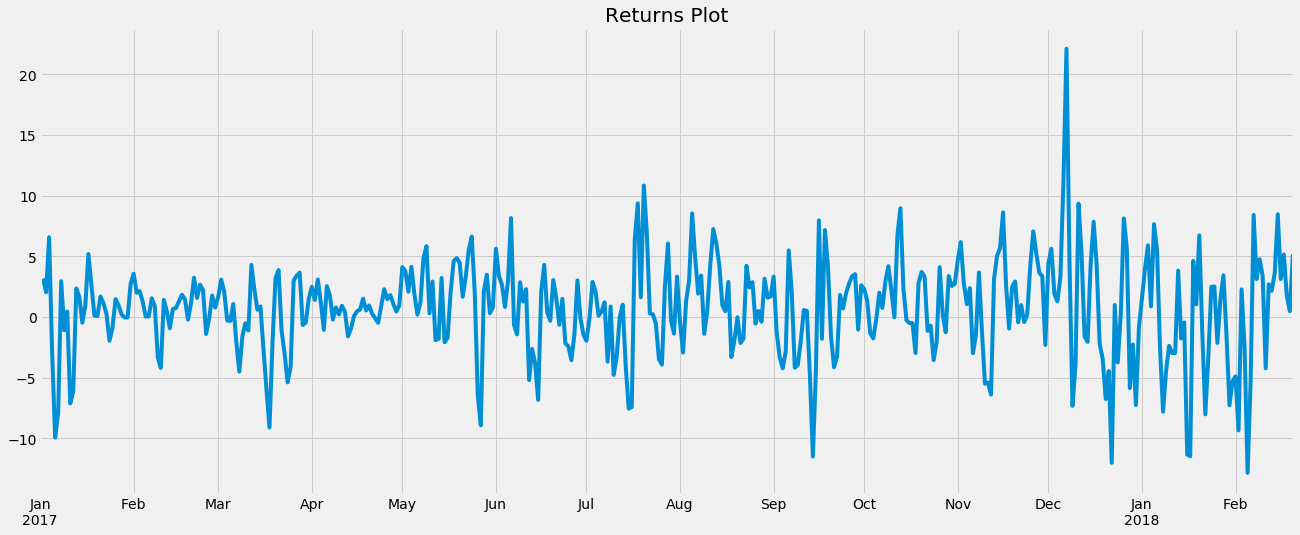

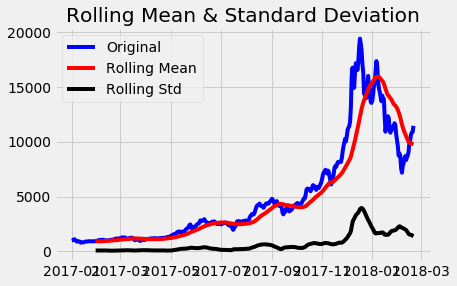

Results of Dickey-Fuller Test
Test Statistic                  -0.777538
p-value                          0.825631
#Lags Used                      14.000000
Number of Observations Used    401.000000
Critical Value(1%)              -3.446763
Critical Value(5%)              -2.868775
Critical Value(10%)             -2.570624
dtype: float64
------------------------------------------------------------------------------
Results of KPSS Test:
Test Statistic            1.745118
p-value                   0.010000
Lags Used                18.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
------------------------------------------------------------------------------
Results of Phillips-Perron Test:
     Phillips-Perron Test (Z-tau)    
Test Statistic                 -0.801
P-value                         0.819
Lags                               18
------------------------------------

C:\Users\mehul\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1707: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


In [14]:
df_bt.description()
df_bt.missing()
df_bt.plot_daily()
df_bt.plot_monthly()
df_bt.Percent_change()
df_bt.Returns()
df_bt.stationarity_test()

The test statistic is way more than the critical statistics threfore the time series is not stationary. Obviously we can see that
Neither the mean is constant nor statndard devaition.

__Time Series Analysis models__

- __AR Model__ - The Autoregression method models the next step in the sequence as the linear function of the obseravtions of last time steps. y(t) = Rho*y(t-1) +e(t) represent the equation for AR Model. Represented by AR(p) where p is the order of the autocorrelated terms. 
- __Simple exponential Smoothing__ - This method models the next step in the sequence as  exponentially weighted linear function of observation of next time steps.
- __MA Model__ - The Moving Average method models the next step in the sequence as the linear function of the residual error from the mean process. y(t) =  Rho*e(t-1) + e(t). This method is valid for univariate time series without trend and seasonality pattern.
- __ARMA Model__- Autoregressive Moving Average method models the next step in the sequence as the linear function of observations & their residuals at prior time steps. y(t) = Rho*y(t-1) + theta*e(t-1) + e(t). This is equation for first order ARMA Model.This method is valid for univariate time series without trend and seasonality
- __ARIMA Model__ - Auto regressive Integrated Moving Average model- method models the next step in the sequence as the linear function of the differenced observation and residual errors. ARIMA model is represented as ARIMA(p,d,q) where p stands for Autoregressive terms, d is the order of difference to be taken & q is the order of moving average term.The method is suitable for univariate time series with trend and without seasonal components.
- __SARIMA Model__ - This method models the next step in the sequence as the linear function of differenced observation and residual and diffrenced seasonal observation and errors. This method can be used to model timeseries with both trend and seasonality patterns. 
- __VAR Model__ - Vectorized Autoregression - The Vector Autoregression (VAR) method models the next step in each time series using an AR model. It is the generalization of AR to multiple parallel time series, e.g. multivariate time series. This model is valid for multivariate time series without trend & seasonality.
- __GARCH Model__ - Autoregessive Conditional Heteroscedaticity is a model that provides methods to model change in variance in the same time series. Generalized Autoregressive Conditional Heteroscedaticity is a model that provides methods to model changes in time dependent volaitility.It consists of a moving average component together with an autoregressive component.

In [118]:
# Since the time series is not stationary we will estimate trend and seasonality from the time series and remove those in order 
# to get a stationary time series
# Estimating trend
bt_log = np.log(df_bt.data.Mean)

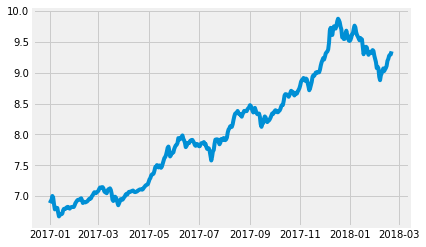

In [119]:
# so we can see there is an upward trend
# Taking log in order to penalize higher values more than smaller values through log transformation.
# We can see that the graph seems slightly stablized now.
plt.plot(bt_log)
plt.show()

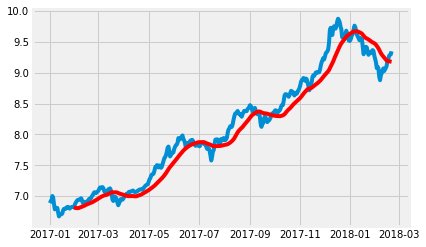

In [120]:
# Smoothing Technique
moving_avg = bt_log.rolling(30).mean()
plt.plot(bt_log)
plt.plot(moving_avg,color='red')
plt.show()

In [121]:
ts_moving_avg_diff = pd.DataFrame(bt_log - moving_avg)


In [122]:
#Since we have taken rolling mean for 30 days, first 29 values of ts_movning_avg_diff will be NAN, therefore dropping those 
ts_moving_avg_diff.dropna(inplace=True)

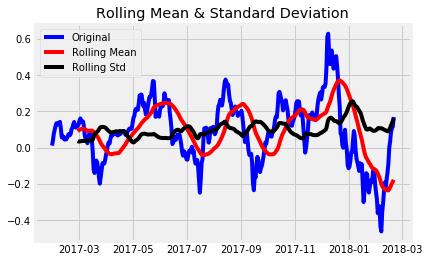

Results of Dickey-Fuller Test
Test Statistic                  -3.095701
p-value                          0.026873
#Lags Used                       5.000000
Number of Observations Used    381.000000
Critical Value(1%)              -3.447631
Critical Value(5%)              -2.869156
Critical Value(10%)             -2.570827
dtype: float64
------------------------------------------------------------------------------
Results of KPSS Test:
Test Statistic            0.125335
p-value                   0.100000
Lags Used                17.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
------------------------------------------------------------------------------
Results of Phillips-Perron Test:
     Phillips-Perron Test (Z-tau)    
Test Statistic                 -2.986
P-value                         0.036
Lags                               17
------------------------------------

C:\Users\mehul\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1709: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [123]:
# We can see that test statistic is now less than 5% critical value and we can say with 95% confidence that the time series is 
#stationary
df_bt.data =ts_moving_avg_diff
df_bt.stationarity_test()

__Simple Exponential Smoothing__

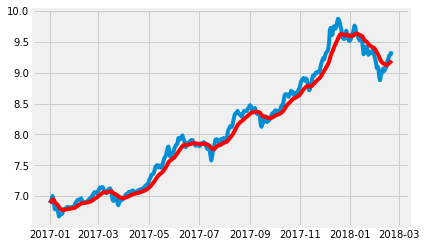

In [124]:
# Trying another technique to estimate trend -- exponentialy weighted average this will penalize the higher values further.
expweighted_avg = bt_log.ewm(span=20).mean()
plt.plot(bt_log)
plt.plot(expweighted_avg,color='red')
plt.show()

In [125]:
ts_ewma_diff = pd.DataFrame(bt_log - expweighted_avg)

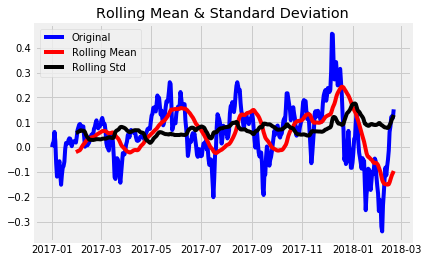

Results of Dickey-Fuller Test
Test Statistic                  -3.660444
p-value                          0.004705
#Lags Used                       2.000000
Number of Observations Used    413.000000
Critical Value(1%)              -3.446283
Critical Value(5%)              -2.868564
Critical Value(10%)             -2.570511
dtype: float64
------------------------------------------------------------------------------
Results of KPSS Test:
Test Statistic            0.121847
p-value                   0.100000
Lags Used                18.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
------------------------------------------------------------------------------
Results of Phillips-Perron Test:
     Phillips-Perron Test (Z-tau)    
Test Statistic                 -3.391
P-value                         0.011
Lags                               18
------------------------------------

C:\Users\mehul\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1709: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [126]:
# We can now see that the test statistic is less than 1% Critical value and we can say by 99% confidence that this is a 
# Stationary time series
df_bt.data =ts_ewma_diff
df_bt.stationarity_test()

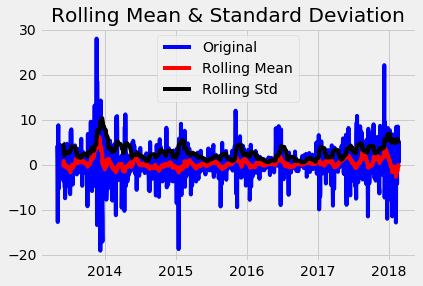

Results of Dickey-Fuller Test
Test Statistic                -1.071007e+01
p-value                        3.349563e-19
#Lags Used                     9.000000e+00
Number of Observations Used    1.749000e+03
Critical Value(1%)            -3.434094e+00
Critical Value(5%)            -2.863194e+00
Critical Value(10%)           -2.567651e+00
dtype: float64
Results of KPSS Test:
------------------------------------------------------------------------------
Test Statistic            0.246073
p-value                   0.100000
Lags Used                25.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
------------------------------------------------------------------------------
Results of Phillips-Perron Test:
     Phillips-Perron Test (Z-tau)    
Test Statistic                -27.809
P-value                         0.000
Lags                               25
----------------------

C:\Users\mehul\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1709: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [15]:
# Estiminating an eliminating trend and seasonality using Diffrrencing
# Returns in our dataframe is actually diffrence only.
# By running the stationarity test on Bitcoin returns we found that this time series is stationary
df_bt = predictions("bitcoin_price.csv")
df_bt.data = df_bt.data.reindex(index=df_bt.data.index[::-1])
df_bt.data["Percent"] = df_bt.data.Mean.div(df_bt.data.Mean.shift())
df_bt.data["Returns"] = df_bt.data.Percent.sub(1).mul(100)
rolmean = df_bt.data.Returns.rolling(30).mean()
rolstd = df_bt.data.Returns.rolling(30).std()
plt.plot(df_bt.data.Returns,color='blue',label='Original')
plt.plot(rolmean,color='red',label='Rolling Mean')
plt.plot(rolstd,color='black',label='Rolling Std')
plt.legend(loc='best')
plt.title("Rolling Mean & Standard Deviation")
plt.show()
# Perform Dickey Fuller Test 
print("Results of Dickey-Fuller Test")
df_bt.data.Returns.dropna(inplace=True)
dftest = adfuller(df_bt.data.Returns)
dfoutput = pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,Value in dftest[4].items():
    dfoutput['Critical Value(%s)'%key] = Value
print(dfoutput)
print ('Results of KPSS Test:')
print("------------------------------------------------------------------------------")
kpsstest = kpss(df_bt.data.Returns, regression='c')
kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
for key,value in kpsstest[3].items():
    kpss_output['Critical Value (%s)'%key] = value
print (kpss_output)
print("------------------------------------------------------------------------------")
print ('Results of Phillips-Perron Test:')
pptest = PhillipsPerron(df_bt.data.Returns)
print(pptest)
print("------------------------------------------------------------------------------")

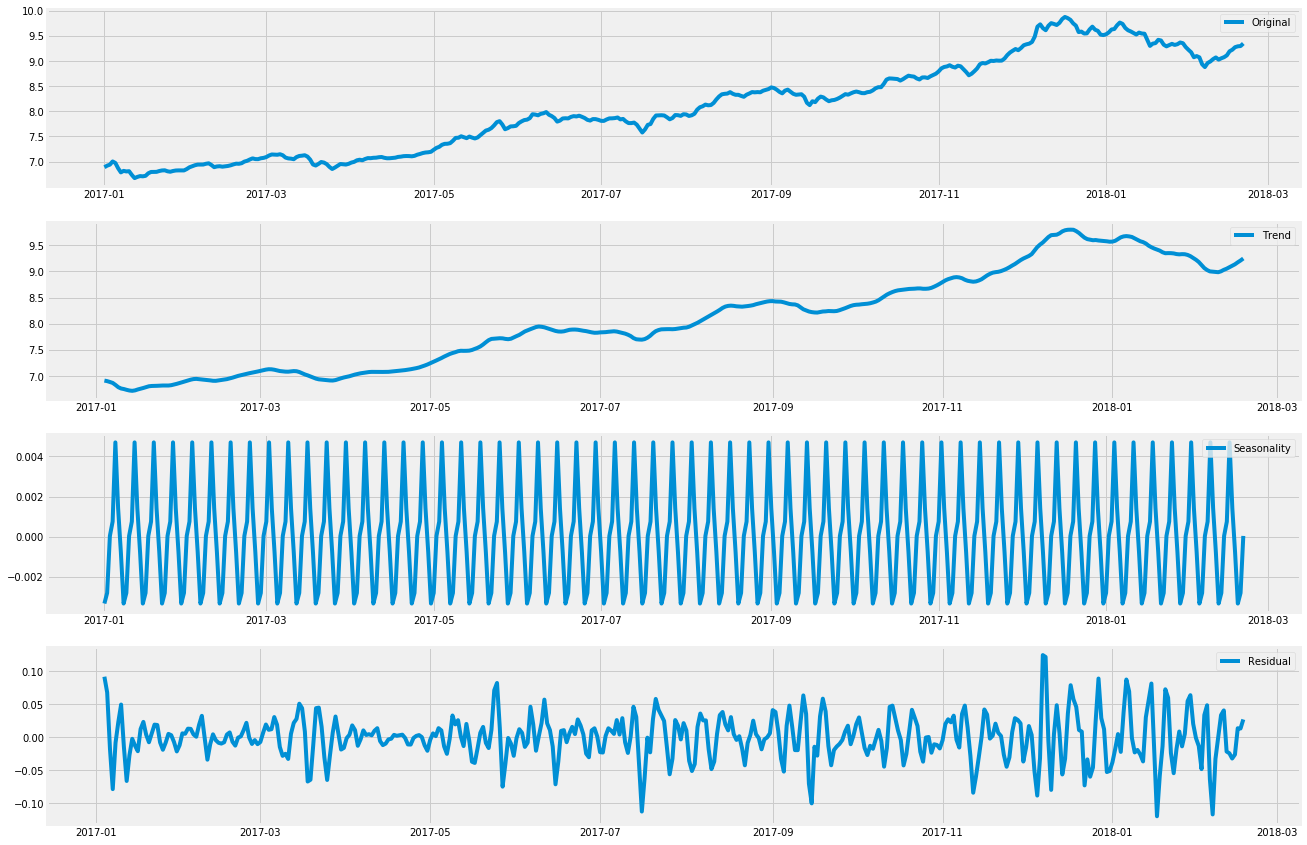

In [132]:
# Estimating and eliminating trend and seasonality by Decomposition
# The below subplot shows the trend, seasonality & Residual components of Original time series
# We will check the stationarity of the residual and can build model on it.
from statsmodels.tsa.seasonal import seasonal_decompose as sd
decomposition = sd(bt_log)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.figure(figsize=(20,15))
plt.tight_layout()
plt.subplot(4,1,1)
plt.plot(bt_log, label='Original')
plt.legend(loc='best')
plt.subplot(4,1,2)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(4,1,3)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(4,1,4)
plt.plot(residual, label='Residual')
plt.legend(loc='best')
plt.show()

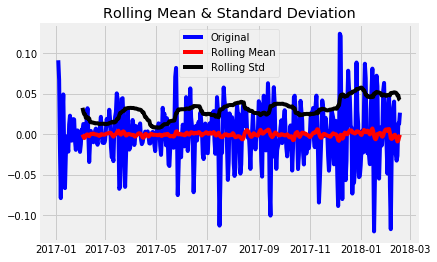

Results of Dickey-Fuller Test
Test Statistic                -8.799480e+00
p-value                        2.131478e-14
#Lags Used                     1.500000e+01
Number of Observations Used    3.940000e+02
Critical Value(1%)            -3.447057e+00
Critical Value(5%)            -2.868904e+00
Critical Value(10%)           -2.570693e+00
dtype: float64
------------------------------------------------------------------------------
Results of KPSS Test:
Test Statistic            0.037946
p-value                   0.100000
Lags Used                18.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
------------------------------------------------------------------------------
Results of Phillips-Perron Test:
     Phillips-Perron Test (Z-tau)    
Test Statistic                -12.091
P-value                         0.000
Lags                               18
----------------------

C:\Users\mehul\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1709: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [133]:
# From the Stationarity test we found that the test statistics is way less than 1% critical value
# So this time series is almost stationary
df_bt.data = pd.DataFrame(residual)
df_bt.data.dropna(inplace=True)
df_bt.stationarity_test()

In [134]:
# Using Returns Series for developing the Forecasting Model
# We'll be using ARIMA 
# For portfolio Optimization we need returns therefore we don't need to diffrence time series or add it back after forecasting
#First plotting ACF and PACF plots in order to determine the AR & MA terms in ARIIMA model

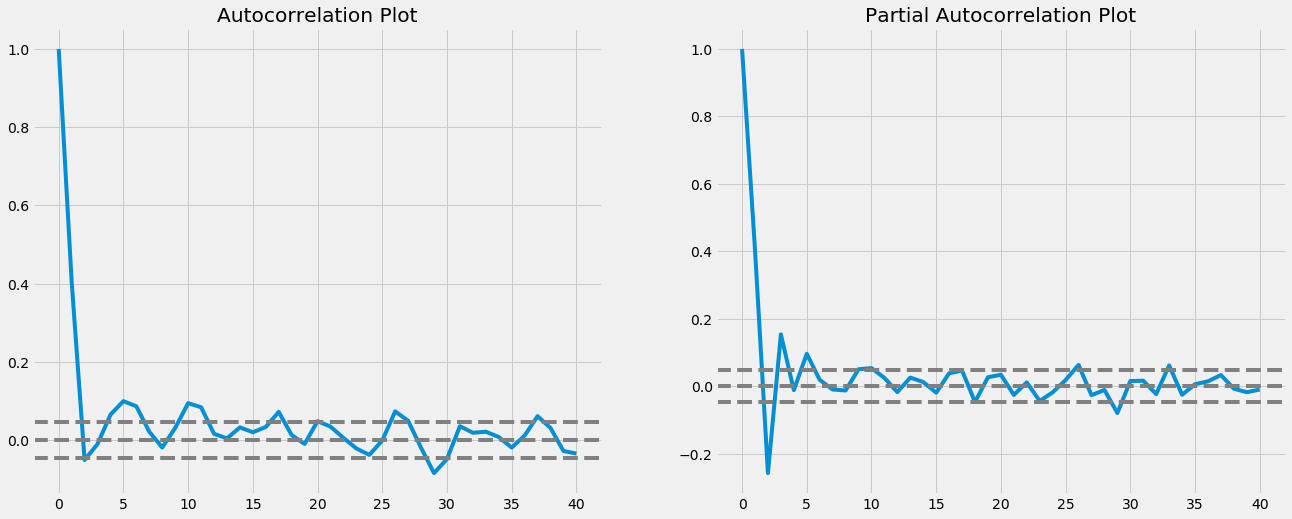

In [17]:
# Plotting ACF and PACF plots
plt.figure(figsize=(20,8))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_bt.data.Returns)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_bt.data.Returns)),linestyle='--',color='gray')
plt.title("Autocorrelation Plot")
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_bt.data.Returns)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_bt.data.Returns)),linestyle='--',color='gray')
plt.title("Partial Autocorrelation Plot")
plt.show()

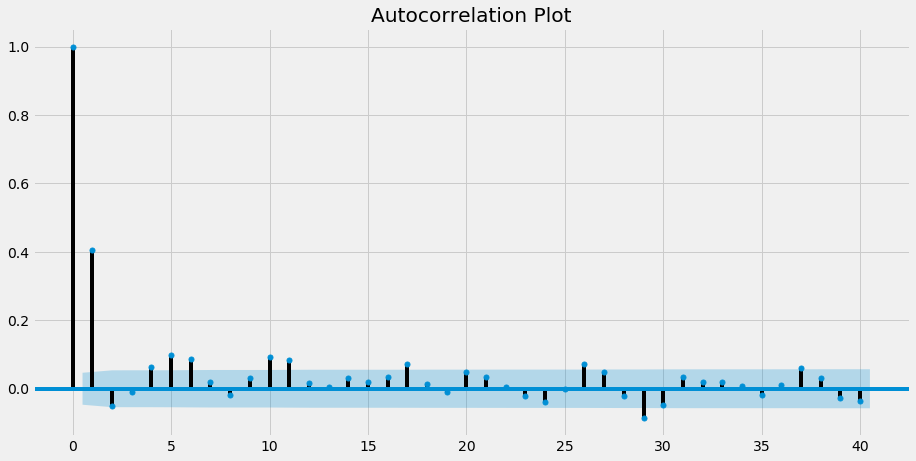

In [18]:
fig,ax = plt.subplots(figsize=(14,7))
acf = smt.graphics.plot_acf(df_bt.data.Returns, lags=40 , alpha=0.05,ax=ax)
plt.title("Autocorrelation Plot")
plt.show()

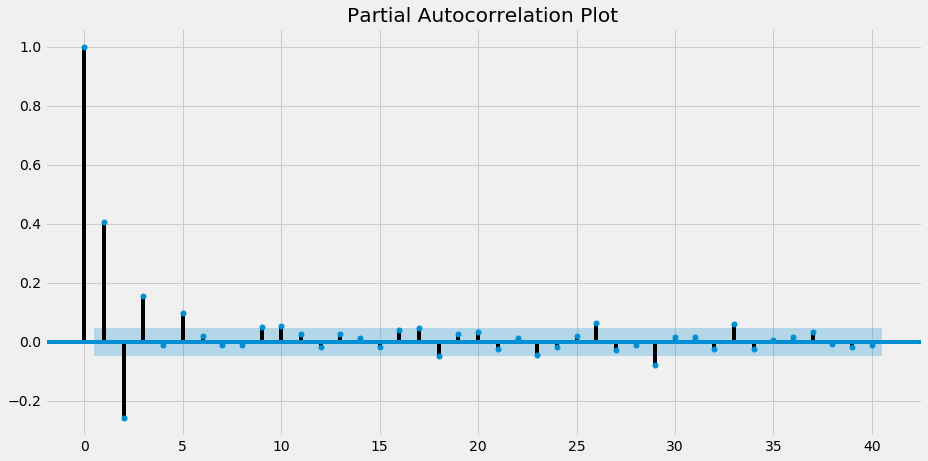

In [19]:
fig,ax = plt.subplots(figsize=(14,7))
acf = smt.graphics.plot_pacf(df_bt.data.Returns, lags=40 , alpha=0.05,ax=ax)
plt.title("Partial Autocorrelation Plot")
plt.show()

In [20]:
# Value of p - where the PACF chart crossses the upper confidence level for the first time p=1
# Value of q - where the ACF chart crossses the upper confidence level for the first time  q=1
# Since the time Series has both AR & MA terms therefore we'll not build an AR or MA model but an ARIMA model

In [10]:
model = ARIMA(df_bt.data.Returns,order=(1,0,2))
results_ARIMA = model.fit()

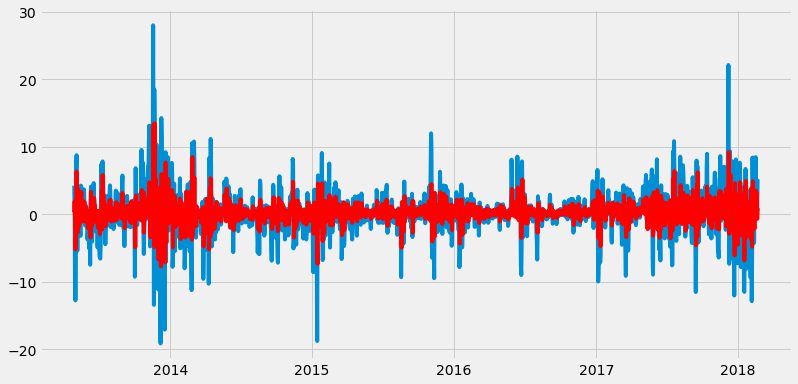

In [22]:
plt.figure(figsize=(12,6))
plt.plot(df_bt.data.Returns)
plt.plot(results_ARIMA.fittedvalues,color='red')
plt.show()

In [23]:
results_ARIMA.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: ARMA
====================================================================
Model:              ARMA             BIC:                 8840.1743 
Dependent Variable: Returns          Log-Likelihood:      -4401.4   
Date:               2019-10-27 21:38 Scale:               1.0000    
No. Observations:   1759             Method:              css-mle   
Df Model:           4                Sample:              04-29-2013
Df Residuals:       1755                                  02-20-2018
Converged:          1.0000           S.D. of innovations: 2.954     
No. Iterations:     16.0000          HQIC:                8822.924  
AIC:                8812.8118                                       
---------------------------------------------------------------------
                   Coef.   Std.Err.     t     P>|t|    [0.025  0.975]
---------------------------------------------------------------------
const              0.3116    0.1061   2.9374  0.0034   0.1037  0.5196
ar.L1.Returns      0.2969    0.2812   1.0561  0.2911  -0.2541  0.8480
ma.L1.Returns      0.2552    0.2790   0.9147  0.3605  -0.2917  0.8022
ma.L2.Returns     -0.1961    0.1571  -1.2482  0.2121  -0.5040  0.1118
-----------------------------------------------------------------------------
                 Real           Imaginary          Modulus          Frequency
-----------------------------------------------------------------------------
AR.1            3.3678             0.0000           3.3678             0.0000
MA.1           -1.6993             0.0000           1.6993             0.5000
MA.2            3.0010             0.0000           3.0010             0.0000
====================================================================

"""

In [12]:
mse = ((df_bt.data.Returns-results_ARIMA.fittedvalues)**2).mean()
RSS = sum((df_bt.data.Returns-results_ARIMA.fittedvalues)**2)
print(f' Residual Sum of Squares: {RSS}')
print(f' Mean Squared Errot: {mse}')
print(f' Root Mean Squared Errot: {round(np.sqrt(mse),2)}')

 Residual Sum of Squares: 4989.2305126918445
 Mean Squared Errot: 11.993342578586164
 Root Mean Squared Errot: 3.46


In [25]:
from produce_predict import *

In [30]:
#This step is parameter Selection for our furniture’s sales ARIMA Time Series Model. Our goal here is to use a “grid search” 
#to find the optimal set of parameters that yields the best performance for our model.
bt_sarima = produce_predict(df_bt.data)  

__Grid Searching best Trend & Seasonality parameters values for SARIMA Model__

The parameters for which the Model has lowest AIC is taken for model development
AIC(Akaike information criterion) - AIC estimates the amount of information lost during model development.Lower the information lost, higher is the quality of the model. AIC deals with trade-off between goodness of fit of model(overfitting) & simplicity of model(Underfitting).<br></br>
AIC = 2*K - 2*ln(L)<br></br> 
Here, K is the number of estimated perimeters in the model & L is the maximum value of the log likelihood of the model.It not only encourages the model for the goodness of fit but, it also penalizes the model for overfitting as by increasing the number of estimated parameters, goodness of fit increases in almost all models & thus increasing the AIC value.Note that AIC tells nothing about the absolute quality of a model, only the quality relative to other models.  

In [31]:
bt_sarima.order()

ARIMA(0, 0, 0)x(0, 0, 0, 30) - AIC:8495.732323557215
ARIMA(0, 0, 0)x(0, 0, 1, 30) - AIC:7572.536405488274
ARIMA(0, 0, 0)x(0, 1, 0, 30) - AIC:7251.28455707917
ARIMA(0, 0, 0)x(0, 1, 1, 30) - AIC:6880.041222850285
ARIMA(0, 0, 0)x(1, 0, 0, 30) - AIC:7270.661292085294
ARIMA(0, 0, 0)x(1, 0, 1, 30) - AIC:7375.748782679901
ARIMA(0, 0, 0)x(1, 1, 0, 30) - AIC:6735.009845269676
ARIMA(0, 0, 0)x(1, 1, 1, 30) - AIC:6716.537525743843
ARIMA(0, 0, 1)x(0, 0, 0, 30) - AIC:7925.441864119377
ARIMA(0, 0, 1)x(0, 0, 1, 30) - AIC:7531.390358448323
ARIMA(0, 0, 1)x(0, 1, 0, 30) - AIC:6754.115475803015
ARIMA(0, 0, 1)x(0, 1, 1, 30) - AIC:6255.331518608016
ARIMA(0, 0, 1)x(1, 0, 0, 30) - AIC:6788.882887464319
ARIMA(0, 0, 1)x(1, 0, 1, 30) - AIC:6757.646814225091
ARIMA(0, 0, 1)x(1, 1, 0, 30) - AIC:6289.09481561555
ARIMA(0, 0, 1)x(1, 1, 1, 30) - AIC:6255.492432756
ARIMA(0, 1, 0)x(0, 0, 0, 30) - AIC:6061.44732510952
ARIMA(0, 1, 0)x(0, 0, 1, 30) - AIC:5652.987579139274
ARIMA(0, 1, 0)x(0, 1, 0, 30) - AIC:5891.063265270643

C:\Users\mehul\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 1, 1, 30) - AIC:5482.948489651374
ARIMA(1, 0, 0)x(1, 0, 0, 30) - AIC:5669.253354636459
ARIMA(1, 0, 0)x(1, 0, 1, 30) - AIC:5671.253283410216
ARIMA(1, 0, 0)x(1, 1, 0, 30) - AIC:5395.001559593094


C:\Users\mehul\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 1, 1, 30) - AIC:5401.309279890625
ARIMA(1, 0, 1)x(0, 0, 0, 30) - AIC:5964.156605467169


C:\Users\mehul\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(0, 0, 1, 30) - AIC:5563.826973048113
ARIMA(1, 0, 1)x(0, 1, 0, 30) - AIC:5789.322551059904


C:\Users\mehul\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(0, 1, 1, 30) - AIC:5379.010692364204
ARIMA(1, 0, 1)x(1, 0, 0, 30) - AIC:5577.646548459084


C:\Users\mehul\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 0, 1, 30) - AIC:5566.05906114304
ARIMA(1, 0, 1)x(1, 1, 0, 30) - AIC:5297.983081084614


C:\Users\mehul\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 1, 1, 30) - AIC:5298.7699178007115
ARIMA(1, 1, 0)x(0, 0, 0, 30) - AIC:5981.5718035774025
ARIMA(1, 1, 0)x(0, 0, 1, 30) - AIC:5578.692840967557
ARIMA(1, 1, 0)x(0, 1, 0, 30) - AIC:5805.195410082123
ARIMA(1, 1, 0)x(0, 1, 1, 30) - AIC:5207.028778445956
ARIMA(1, 1, 0)x(1, 0, 0, 30) - AIC:5578.730364426196
ARIMA(1, 1, 0)x(1, 0, 1, 30) - AIC:5580.691765279502
ARIMA(1, 1, 0)x(1, 1, 0, 30) - AIC:5304.774201313817
ARIMA(1, 1, 0)x(1, 1, 1, 30) - AIC:5208.541349856959
ARIMA(1, 1, 1)x(0, 0, 0, 30) - AIC:5948.659050445972
ARIMA(1, 1, 1)x(0, 0, 1, 30) - AIC:5547.323122754145
ARIMA(1, 1, 1)x(0, 1, 0, 30) - AIC:5775.400794550617
ARIMA(1, 1, 1)x(0, 1, 1, 30) - AIC:5176.9923310893755
ARIMA(1, 1, 1)x(1, 0, 0, 30) - AIC:5560.816686904891
ARIMA(1, 1, 1)x(1, 0, 1, 30) - AIC:5549.32246041814
ARIMA(1, 1, 1)x(1, 1, 0, 30) - AIC:5284.906200555524
ARIMA(1, 1, 1)x(1, 1, 1, 30) - AIC:5178.383534337322


__From the above Simulation we can see that the AIC is minimum for trend parameters (p,d,q) = (0,1,1) & Seasonality Parameters (p,d,q,window) = (0,1,1,30)__

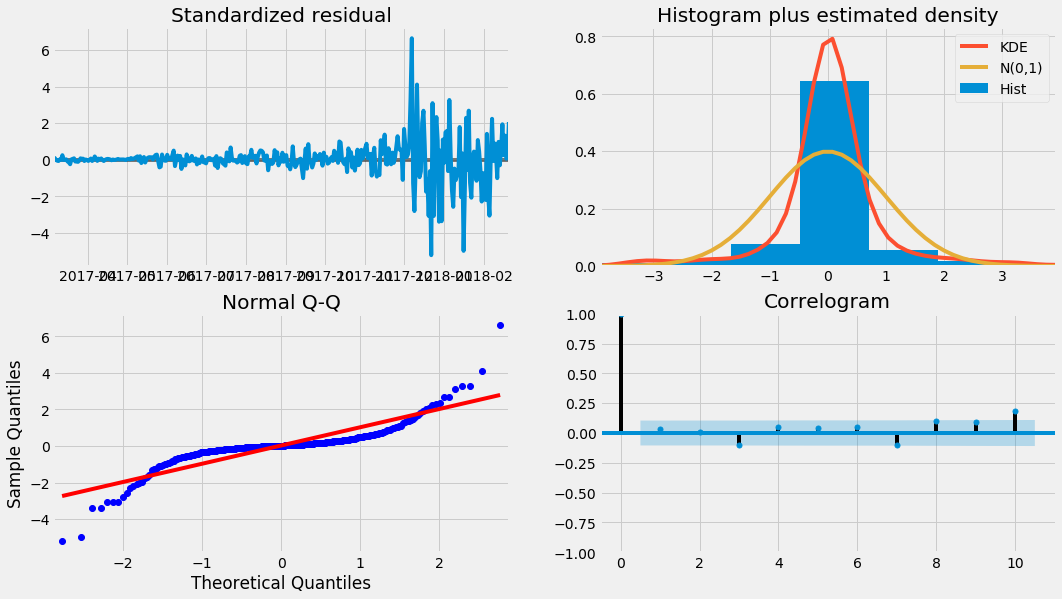

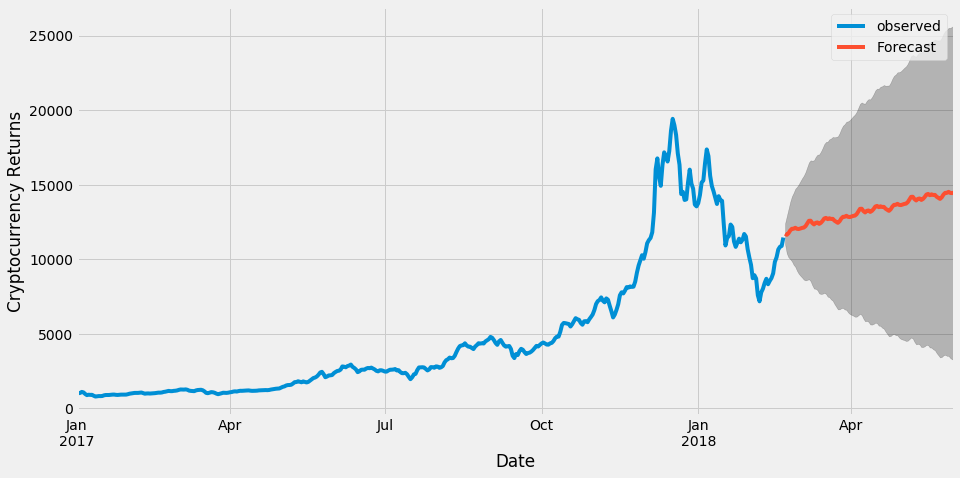

In [32]:
bt_sarima.sarima_model((0,1,1),(0,1,1,30))
bt_sarima.diagnostics()
bt_sarima.produce_forecast()

In [33]:
from fbprophet import Prophet
from prophet_model import *
bt_pro = prophet_model("bitcoin_price.csv",1344)

<Figure size 1296x432 with 0 Axes>

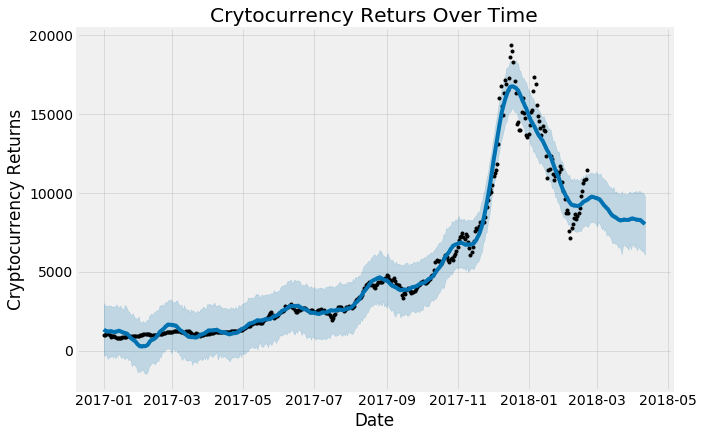

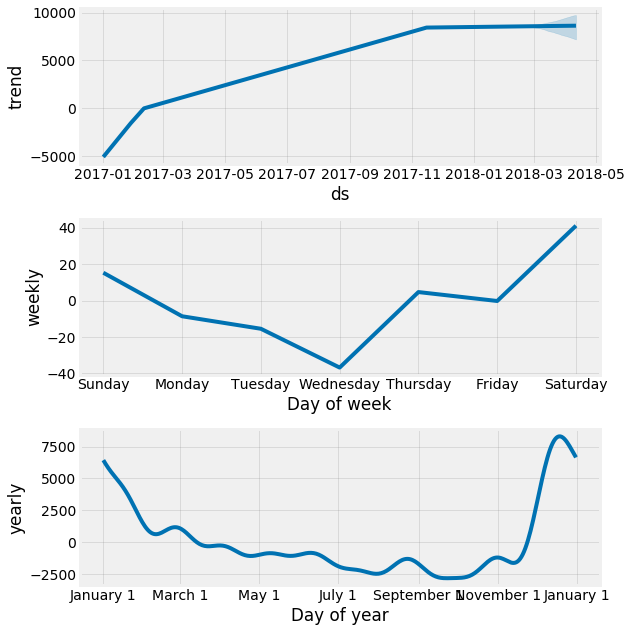

In [34]:
bt_pro.model()
bt_pro.forecast()
bt_pro.Vizualization()

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
 __Value at Risk__ <br></br>
Here VaR is a class consisting of methods to calculate Value at Risk by Variance-Covariance Method, Historical Simulation and Monte Carlo Method. Risk is seen as the difference between Actual & Expected Returns.Expected Return is not what the investors believe they can earn but it reflects the result of averaging outcome of all scenarios.
1 % Value at Risk gives the best rate of return out of top 1% worst case returns. Also 1% VaR means we can say by 99% confidence that the losses won't exceed this number.

Assumptions:-
- Past Returns is a predictor of the future returns. However, practically we cannot say so.
- If return expection in asset prices are rational, they should be normally distributed around the expectation.i.e.,the returns should be normally distributed around the mean. 

Methods to calculate Value At Risk
- Variance-Covariance Method
- Historical Simulation
- Monte Carlo Method

In [12]:

from VaR import *

In [13]:
bt_var = Var(df_bt.data)

__Variance-Covariance Method__<br></br>
Here we compute the mean and standard deviation of the returns (assuming returns are normally distributed), we can say that 
Value at Risk = Z*stdev + mean
__Historical Simulation__<br></br>
Here we just sort the returns in ascending order and depending on the confidence interval(Suppose 5%), VaR is equal to the best rate of return from the top 5% worst rate of Returns.

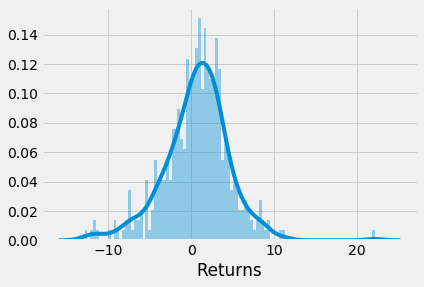

Confidence Interval      Value At Risk
---------------------  ---------------
90%                           -4.37766
95%                           -5.81024
99%                           -8.49752


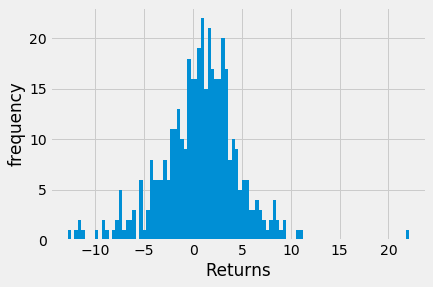

Confidence Interval      Value At Risk
---------------------  ---------------
90%                           -4.15191
95%                           -6.40014
99%                          -11.1237


In [15]:
bt_var.var_cov(100)
bt_var.hist_sim(100)

__Monte Carlo Simulation__<br></br>


In [16]:
bt_var.monte_carlo()

Simulated VAR is  -44.17995650167851
